# Wine Quality Prediction - Results Analysis

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob

sys.path.append('..')
from config import *

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [3]:
figures_dir = RESULTS_DIR / 'figures'
figures_dir.mkdir(parents=True, exist_ok=True)

## Load Experiment Results

In [4]:
def load_all_results():
    results_dir = RESULTS_DIR / 'metrics'
    all_files = glob.glob(str(results_dir / '*.csv'))

    dfs = []
    for file in all_files:
        df = pd.read_csv(file)
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['model_type'] = combined_df['model_name'].str.split('(').str[0].str.strip()

    return combined_df

results_df = load_all_results()
print(f"Total experiments loaded: {len(results_df)}")

results_df.head(10)

Total experiments loaded: 64


,model_name,wine_type,accuracy,precision,recall,f1,C,kernel,gamma,random_state,...,min_samples_leaf,criterion,n_neighbors,weights,metric,p,learning_rate,base_estimator_max_depth,max_iter,model_type
0,"SVM (C=0.1, kernel=rbf)",red,0.629167,0.540223,0.629167,0.580756,0.1,rbf,scale,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SVM
1,"Random Forest (n_estimators=200, max_depth=None)",red,0.741667,0.745763,0.741667,0.740848,NaN,NaN,NaN,49.0,...,1.0,gini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Random Forest
2,Decision Tree (max_depth=None),red,0.650000,0.650785,0.650000,0.650320,NaN,NaN,NaN,49.0,...,1.0,entropy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decision Tree
3,"Random Forest (n_estimators=200, max_depth=None)",white,0.703401,0.711988,0.703401,0.703087,NaN,NaN,NaN,49.0,...,1.0,gini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Random Forest
4,"KNN (k=5, weights=uniform)",white,0.586395,0.586833,0.586395,0.585926,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,uniform,minkowski,2.0,NaN,NaN,NaN,KNN
5,"Random Forest (n_estimators=100, max_depth=None)",white,0.703401,0.711958,0.703401,0.703167,NaN,NaN,NaN,49.0,...,1.0,gini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Random Forest
6,"Random Forest (n_estimators=100, max_depth=20)",white,0.697279,0.706625,0.697279,0.696684,NaN,NaN,NaN,49.0,...,1.0,gini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Random Forest
7,Stratified Baseline Model,red,0.358333,0.363765,0.358333,0.360942,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stratified Baseline Model
8,"AdaBoost (n_estimators=100, lr=1.5)",red,0.606250,0.608304,0.606250,0.605484,NaN,NaN,NaN,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.0,NaN,AdaBoost
9,"KNN (k=5, weights=uniform)",red,0.645833,0.644159,0.645833,0.644799,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,uniform,minkowski,2.0,NaN,NaN,NaN,KNN


## Model Comparison

In [5]:
best_results = results_df.loc[
    results_df.groupby(['model_type', 'wine_type'])['accuracy'].idxmax()
].copy()

print("Best Results by Model Type and Wine Type:")
print(best_results[['model_type', 'wine_type', 'accuracy', 'precision', 'recall', 'f1']].to_string(index=False))

Best Results by Model Type and Wine Type:
               model_type wine_type  accuracy  precision   recall       f1
                 AdaBoost       red  0.664583   0.681013 0.664583 0.654260
                 AdaBoost     white  0.572109   0.574054 0.572109 0.572083
           Baseline Model       red  0.464583   0.215838 0.464583 0.294743
           Baseline Model     white  0.448980   0.201583 0.448980 0.278241
            Decision Tree       red  0.650000   0.650785 0.650000 0.650320
            Decision Tree     white  0.629252   0.629632 0.629252 0.629298
                      KNN       red  0.706250   0.713182 0.706250 0.708187
                      KNN     white  0.687755   0.690426 0.687755 0.687796
      Logistic Regression       red  0.647917   0.640617 0.647917 0.633072
      Logistic Regression     white  0.562585   0.575503 0.562585 0.555329
            Random Forest       red  0.758333   0.762231 0.758333 0.756604
            Random Forest     white  0.703401   0.711988 0

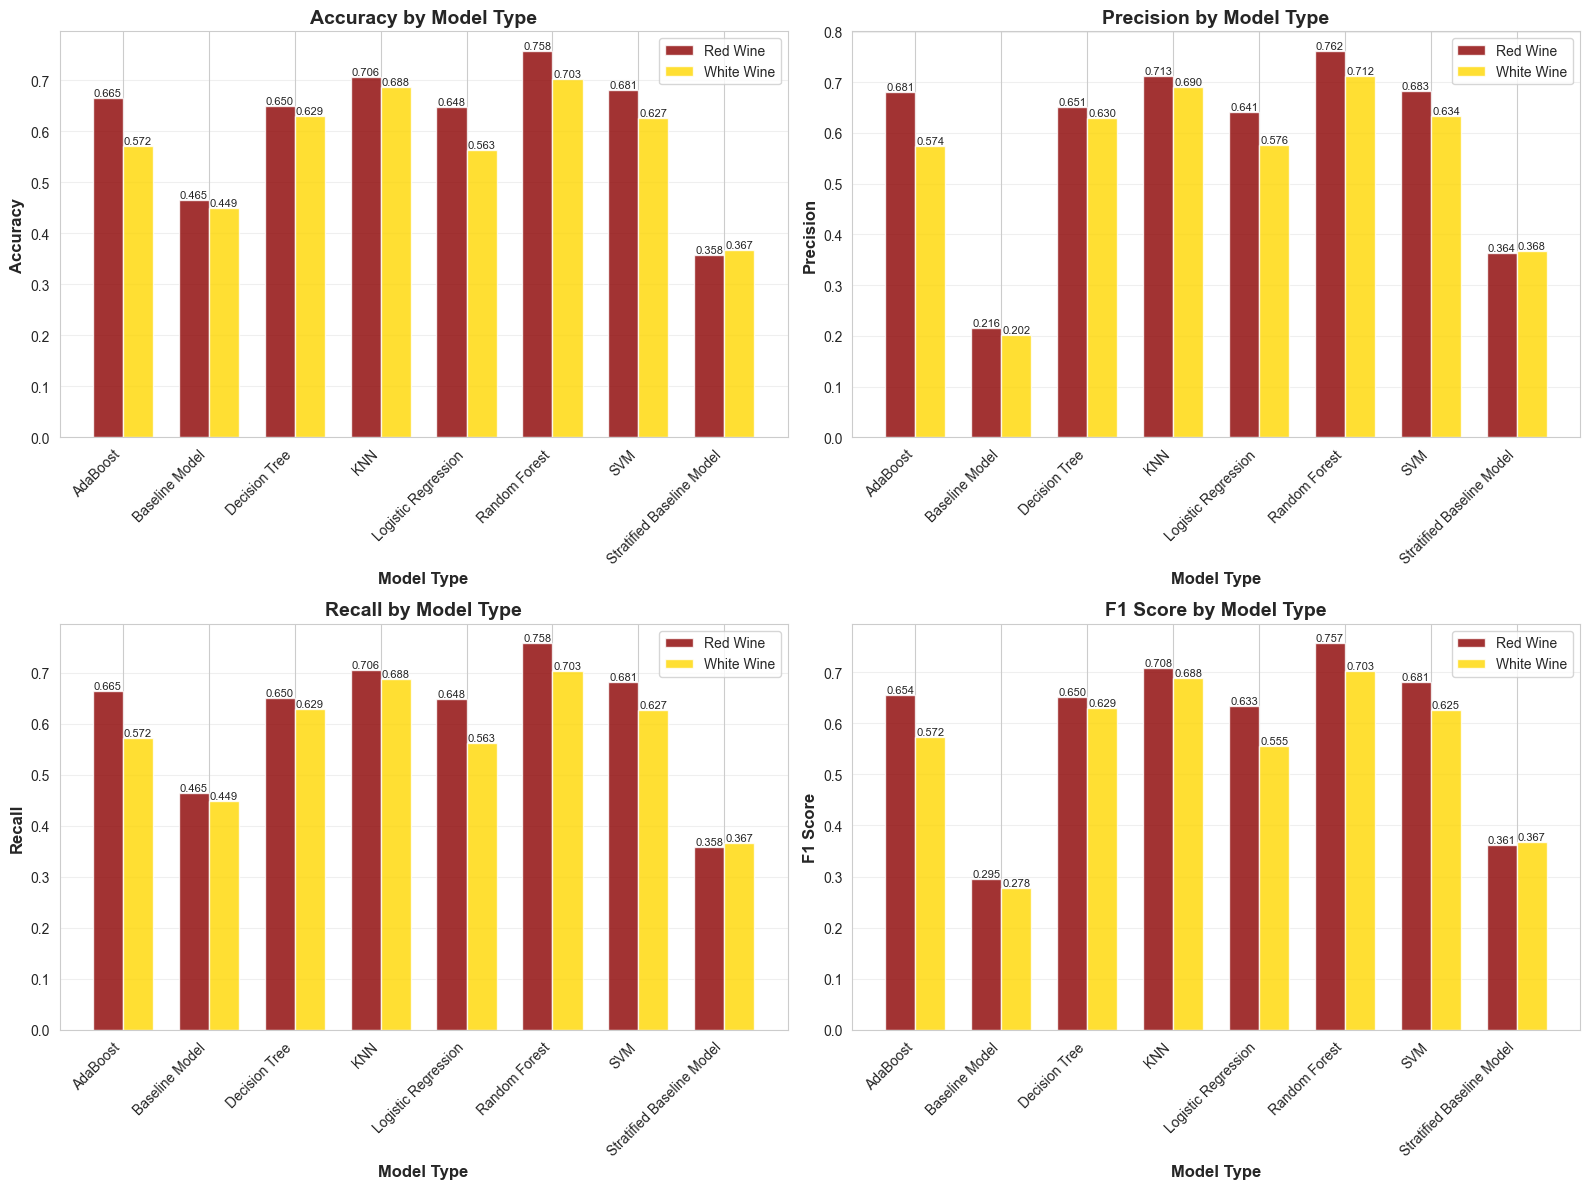

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics = ['accuracy', 'precision', 'recall', 'f1']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for idx, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[idx // 2, idx % 2]

    plot_data = best_results.pivot(index='model_type', columns='wine_type', values=metric)

    x = np.arange(len(plot_data.index))
    width = 0.35

    bars1 = ax.bar(x - width/2, plot_data['red'], width, label='Red Wine', color='darkred', alpha=0.8)
    bars2 = ax.bar(x + width/2, plot_data['white'], width, label='White Wine', color='gold', alpha=0.8)

    ax.set_xlabel('Model Type', fontsize=12, fontweight='bold')
    ax.set_ylabel(name, fontsize=12, fontweight='bold')
    ax.set_title(f"{name} by Model Type", fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(plot_data.index, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=8)
            
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'figures' / 'overall_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Performance Rankings

In [7]:
for wine_type in ['red', 'white']:
    print(f"Top 5 Models for {wine_type.upper()} Wine (by Accuracy)")

    wine_results = results_df[results_df['wine_type'] == wine_type].copy()
    wine_results = wine_results.sort_values('accuracy', ascending=False)

    print(wine_results[['model_name', 'accuracy', 'precision', 'recall', 'f1']].head().to_string(index=False))

Top 5 Models for RED Wine (by Accuracy)
                                      model_name  accuracy  precision   recall       f1
  Random Forest (n_estimators=100, max_depth=20)  0.758333   0.762231 0.758333 0.756604
Random Forest (n_estimators=100, max_depth=None)  0.754167   0.756431 0.754167 0.752208
Random Forest (n_estimators=200, max_depth=None)  0.741667   0.745763 0.741667 0.740848
 Random Forest (n_estimators=50, max_depth=None)  0.739583   0.739925 0.739583 0.738321
  Random Forest (n_estimators=100, max_depth=10)  0.735417   0.737544 0.735417 0.733175
Top 5 Models for WHITE Wine (by Accuracy)
                                      model_name  accuracy  precision   recall       f1
Random Forest (n_estimators=200, max_depth=None)  0.703401   0.711988 0.703401 0.703087
Random Forest (n_estimators=100, max_depth=None)  0.703401   0.711958 0.703401 0.703167
 Random Forest (n_estimators=50, max_depth=None)  0.700000   0.707792 0.700000 0.699439
  Random Forest (n_estimators=100, max

## Hyperparameter Analysis

/var/folders/l1/gwz054jn7fv82sqt7mhyd42c0000gn/T/ipykernel_38530/2733071969.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)
/var/folders/l1/gwz054jn7fv82sqt7mhyd42c0000gn/T/ipykernel_38530/2733071969.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


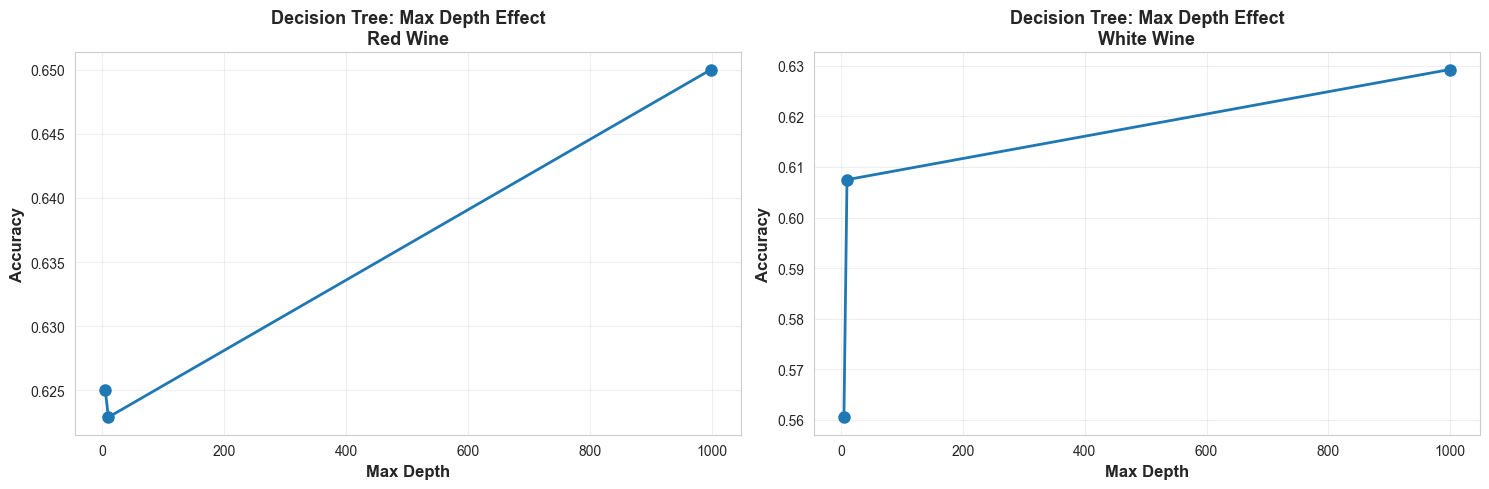

In [8]:
dt_results = results_df[results_df['model_type'] == 'Decision Tree'].copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx, wine_type in enumerate(['red', 'white']):
    wine_dt = dt_results[dt_results['wine_type'] == wine_type]

    wine_dt = wine_dt.copy()
    wine_dt['max_depth_plot'] = wine_dt['max_depth'].fillna(999)
    wine_dt = wine_dt.sort_values('max_depth_plot')

    ax = axes[idx]
    ax.plot(wine_dt['max_depth_plot'], wine_dt['accuracy'], marker='o', linewidth=2, markersize=8)
    ax.set_xlabel('Max Depth', fontsize=12, fontweight='bold')
    ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax.set_title(f'Decision Tree: Max Depth Effect\n{wine_type.capitalize()} Wine',
                 fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

    xticks = ax.get_xticks()
    xticklabels = [str(int(x)) if x != 999 else 'None' for x in xticks]
    ax.set_xticklabels(xticklabels)

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'figures' / 'decision_tree_max_depth.png', dpi=300, bbox_inches='tight')
plt.show()

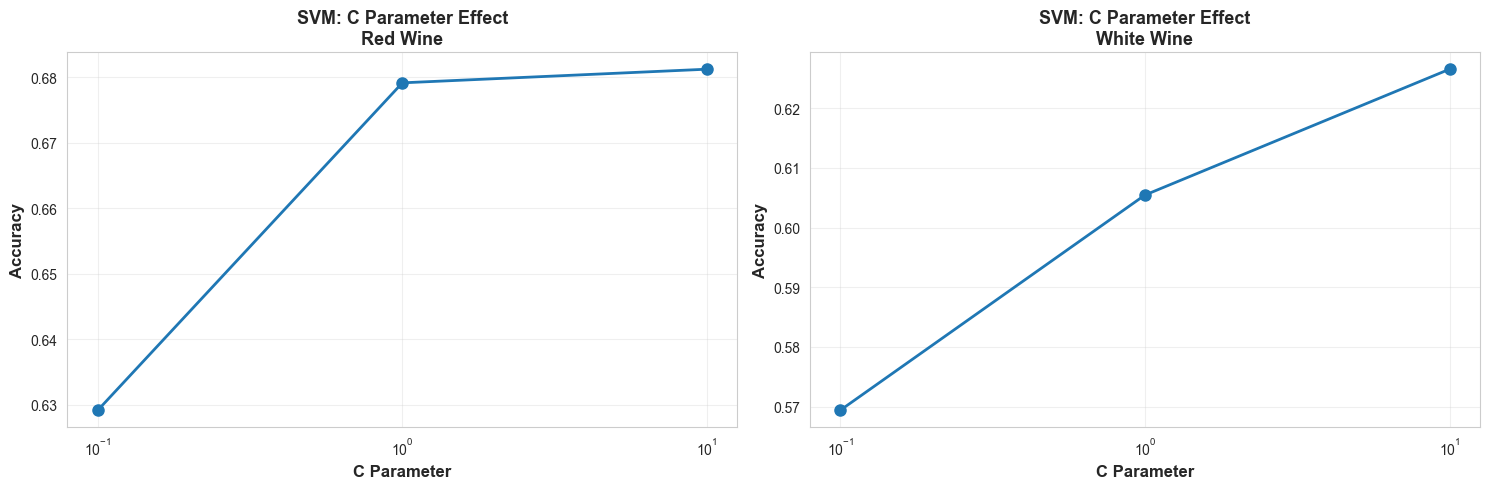

In [9]:
svm_results = results_df[results_df['model_type'] == 'SVM'].copy()

if len(svm_results) > 0 and 'C' in svm_results.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    for idx, wine_type in enumerate(['red', 'white']):
        wine_svm = svm_results[svm_results['wine_type'] == wine_type]
        wine_svm = wine_svm.sort_values('C')
        
        ax = axes[idx]
        ax.plot(wine_svm['C'], wine_svm['accuracy'], marker='o', linewidth=2, markersize=8)
        ax.set_xlabel('C Parameter', fontsize=12, fontweight='bold')
        ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
        ax.set_title(f'SVM: C Parameter Effect\n{wine_type.capitalize()} Wine', 
                    fontsize=13, fontweight='bold')
        ax.set_xscale('log')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(RESULTS_DIR / 'figures' / 'svm_c_parameter.png', dpi=300, bbox_inches='tight')
    plt.show()

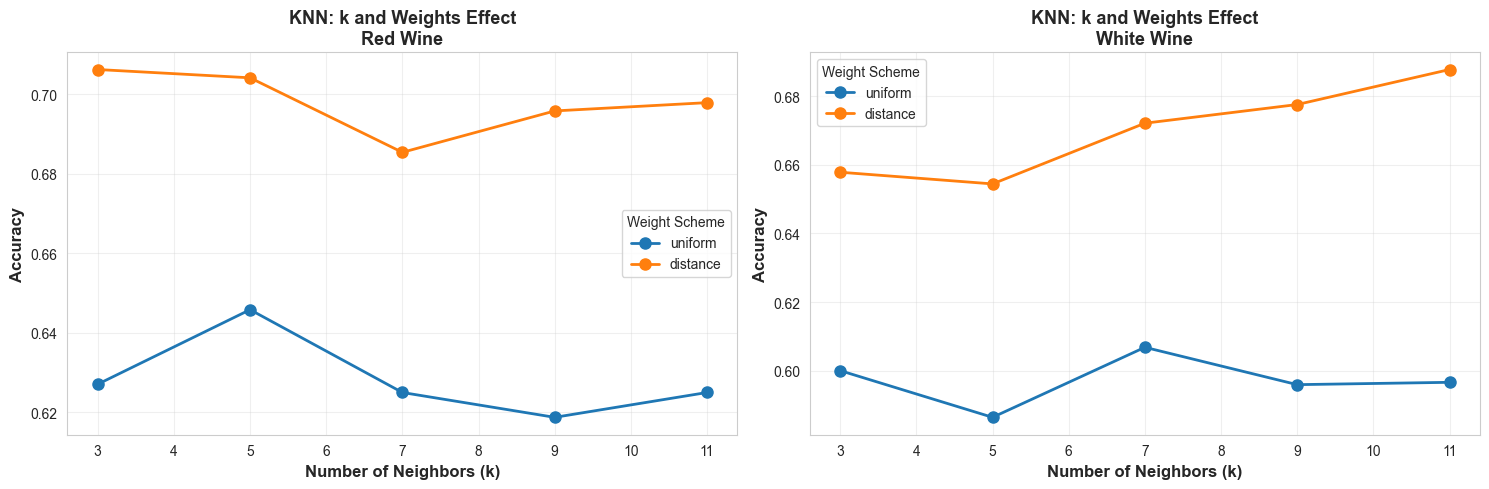

In [10]:
knn_results = results_df[results_df['model_type'] == 'KNN'].copy()

if len(knn_results) > 0 and 'n_neighbors' in knn_results.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    for idx, wine_type in enumerate(['red', 'white']):
        wine_knn = knn_results[knn_results['wine_type'] == wine_type]
        
        ax = axes[idx]
        
        for weight_scheme in wine_knn['weights'].unique():
            data = wine_knn[wine_knn['weights'] == weight_scheme].sort_values('n_neighbors')
            ax.plot(data['n_neighbors'], data['accuracy'], 
                   marker='o', linewidth=2, markersize=8, label=weight_scheme)
        
        ax.set_xlabel('Number of Neighbors (k)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
        ax.set_title(f'KNN: k and Weights Effect\n{wine_type.capitalize()} Wine', 
                    fontsize=13, fontweight='bold')
        ax.legend(title='Weight Scheme')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(RESULTS_DIR / 'figures' / 'knn_hyperparameters.png', dpi=300, bbox_inches='tight')
    plt.show()

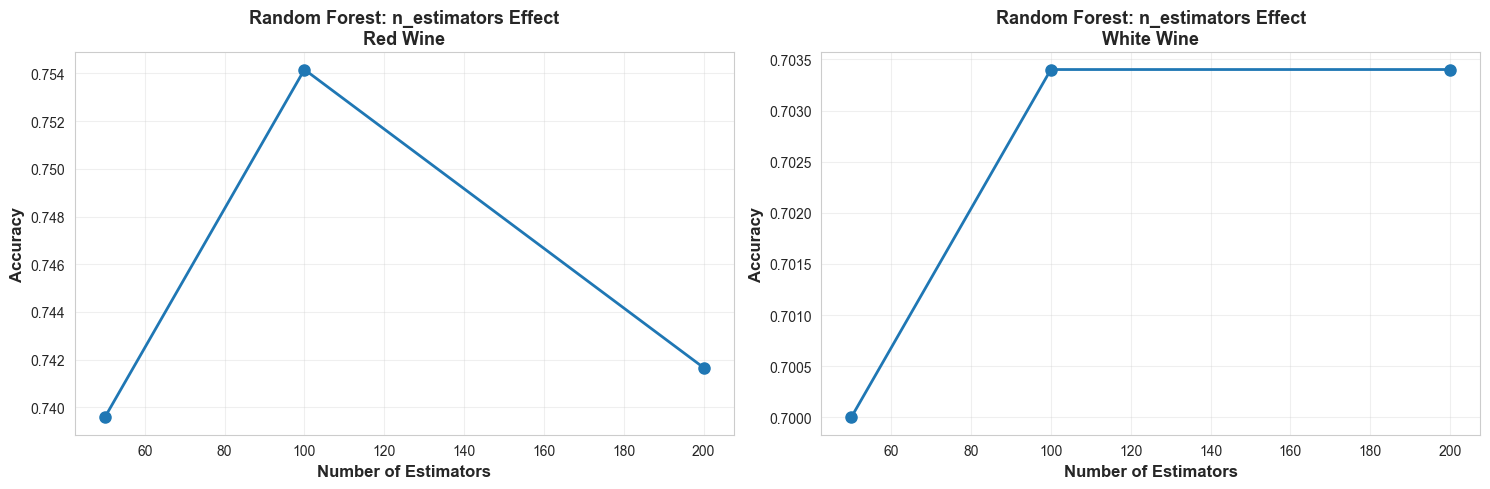

In [11]:
rf_results = results_df[results_df['model_type'] == 'Random Forest'].copy()

if len(rf_results) > 0 and 'n_estimators' in rf_results.columns:
    # Filter to only vary n_estimators (where max_depth is None)
    rf_n_est = rf_results[rf_results['max_depth'].isna()]
    
    if len(rf_n_est) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        for idx, wine_type in enumerate(['red', 'white']):
            wine_rf = rf_n_est[rf_n_est['wine_type'] == wine_type]
            wine_rf = wine_rf.sort_values('n_estimators')
            
            ax = axes[idx]
            ax.plot(wine_rf['n_estimators'], wine_rf['accuracy'], marker='o', linewidth=2, markersize=8)
            ax.set_xlabel('Number of Estimators', fontsize=12, fontweight='bold')
            ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
            ax.set_title(f'Random Forest: n_estimators Effect\n{wine_type.capitalize()} Wine', 
                        fontsize=13, fontweight='bold')
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(RESULTS_DIR / 'figures' / 'random_forest_n_estimators.png', dpi=300, bbox_inches='tight')
        plt.show()

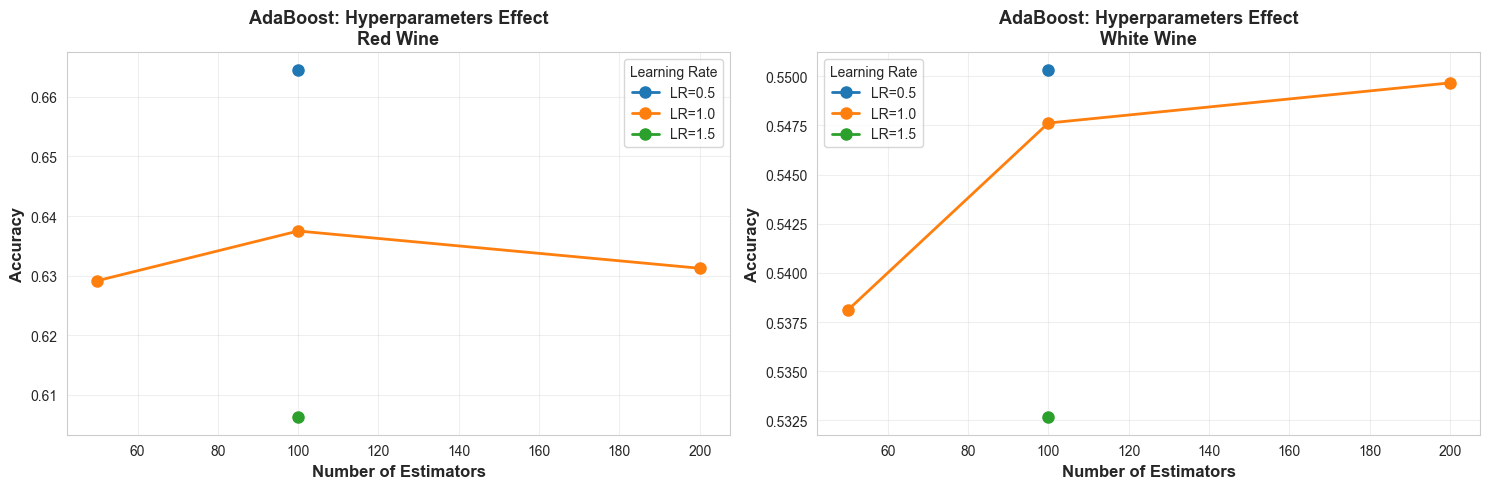

In [12]:
ada_results = results_df[results_df['model_type'] == 'AdaBoost'].copy()

if len(ada_results) > 0 and 'learning_rate' in ada_results.columns:
    # Filter to only base_depth=1 for cleaner visualization
    ada_filtered = ada_results[ada_results['base_estimator_max_depth'] == 1]
    
    if len(ada_filtered) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        for idx, wine_type in enumerate(['red', 'white']):
            wine_ada = ada_filtered[ada_filtered['wine_type'] == wine_type]
            
            ax = axes[idx]
            
            for lr in sorted(wine_ada['learning_rate'].unique()):
                data = wine_ada[wine_ada['learning_rate'] == lr].sort_values('n_estimators')
                ax.plot(data['n_estimators'], data['accuracy'], 
                       marker='o', linewidth=2, markersize=8, label=f'LR={lr}')
            
            ax.set_xlabel('Number of Estimators', fontsize=12, fontweight='bold')
            ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
            ax.set_title(f'AdaBoost: Hyperparameters Effect\n{wine_type.capitalize()} Wine', 
                        fontsize=13, fontweight='bold')
            ax.legend(title='Learning Rate')
            ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(RESULTS_DIR / 'figures' / 'adaboost_hyperparameters.png', dpi=300, bbox_inches='tight')
        plt.show()

## Red vs. White Wine Analysis

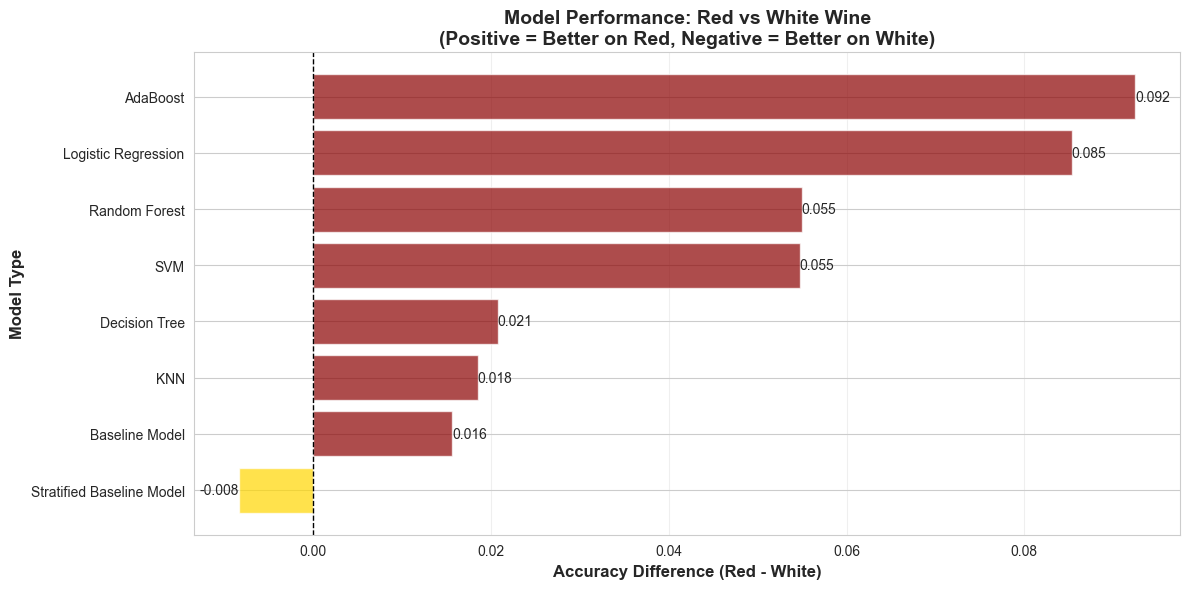


Detailed Comparison:
               model_type  red_accuracy  white_accuracy  difference
Stratified Baseline Model      0.358333        0.366667   -0.008333
           Baseline Model      0.464583        0.448980    0.015604
                      KNN      0.706250        0.687755    0.018495
            Decision Tree      0.650000        0.629252    0.020748
                      SVM      0.681250        0.626531    0.054719
            Random Forest      0.758333        0.703401    0.054932
      Logistic Regression      0.647917        0.562585    0.085332
                 AdaBoost      0.664583        0.572109    0.092474


In [13]:
comparison_data = []

for model_type in best_results['model_type'].unique():
    red_acc = best_results[(best_results['model_type'] == model_type) &
                           (best_results['wine_type'] == 'red')]['accuracy'].values[0]
    white_acc = best_results[(best_results['model_type'] == model_type) &
                           (best_results['wine_type'] == 'white')]['accuracy'].values[0]
    comparison_data.append({
        'model_type': model_type,
        'red_accuracy': red_acc,
        'white_accuracy': white_acc,
        'difference': red_acc - white_acc
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('difference')

plt.figure(figsize=(12, 6))
colors = ['darkred' if x > 0 else 'gold' for x in comparison_df['difference']]
plt.barh(comparison_df['model_type'], comparison_df['difference'], color=colors, alpha=0.7)
plt.xlabel('Accuracy Difference (Red - White)', fontsize=12, fontweight='bold')
plt.ylabel('Model Type', fontsize=12, fontweight='bold')
plt.title('Model Performance: Red vs White Wine\n(Positive = Better on Red, Negative = Better on White)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(comparison_df.iterrows()):
    plt.text(row['difference'], i, f"{row['difference']:.3f}", 
            va='center', ha='left' if row['difference'] > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'figures' / 'red_vs_white_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDetailed Comparison:")
print(comparison_df.to_string(index=False))

## Model Category Performance

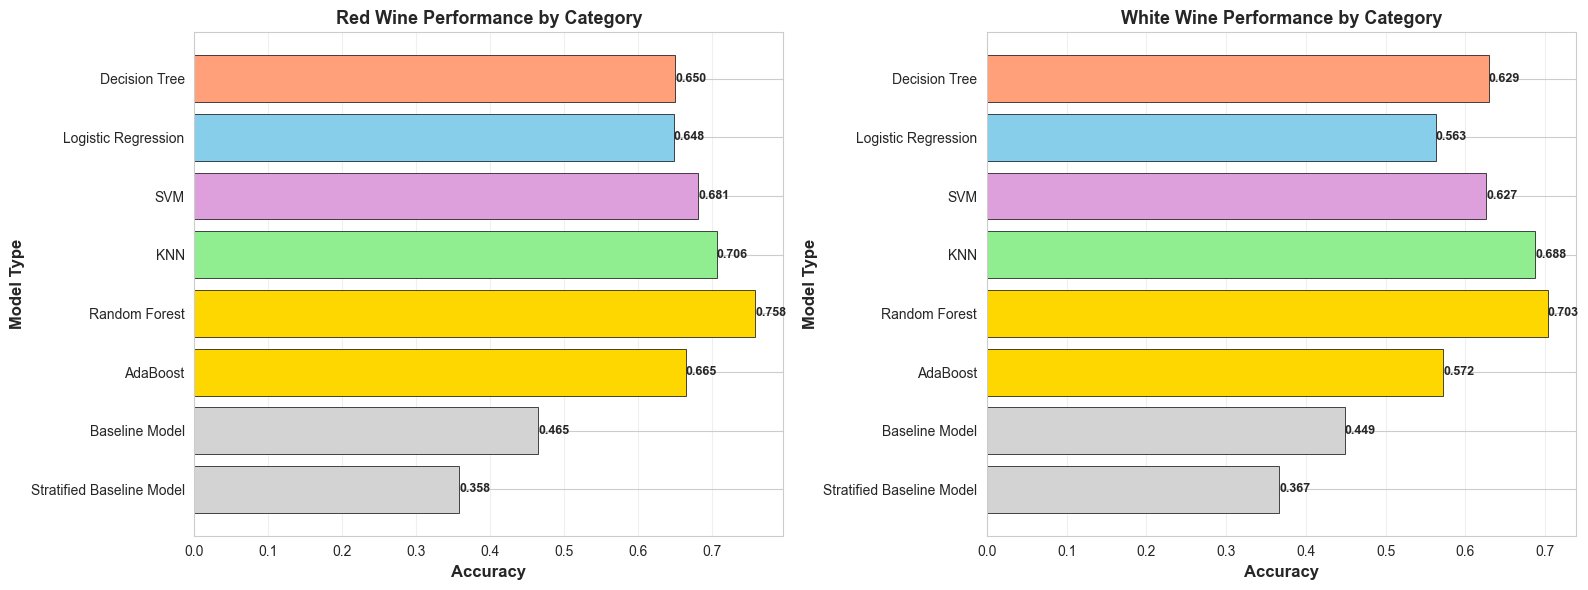

In [16]:
model_categories = {
    'Baseline': ['Baseline Model', 'Stratified Baseline Model'],
    'Linear': ['Logistic Regression'],
    'Instance-Based': ['KNN'],
    'Tree-Based': ['Decision Tree'],
    'Kernel': ['SVM'],
    'Ensemble': ['Random Forest', 'AdaBoost']
}

model_to_category = {}
for category, models in model_categories.items():
    for model in models:
        model_to_category[model] = category

best_results['category'] = best_results['model_type'].map(model_to_category)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, wine_type in enumerate(['red', 'white']):
    wine_data = best_results[best_results['wine_type'] == wine_type]
    
    ax = axes[idx]
    
    wine_data = wine_data.sort_values(['category', 'accuracy'])
    
    colors_map = {
        'Baseline': 'lightgray',
        'Linear': 'skyblue',
        'Instance-Based': 'lightgreen',
        'Tree-Based': 'lightsalmon',
        'Kernel': 'plum',
        'Ensemble': 'gold'
    }
    
    colors = [colors_map[cat] for cat in wine_data['category']]
    
    bars = ax.barh(wine_data['model_type'], wine_data['accuracy'], color=colors, edgecolor='black', linewidth=0.5)
    ax.set_xlabel('Accuracy', fontsize=12, fontweight='bold')
    ax.set_ylabel('Model Type', fontsize=12, fontweight='bold')
    ax.set_title(f'{wine_type.capitalize()} Wine Performance by Category', fontsize=13, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2.,
               f'{width:.3f}',
               ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'figures' / 'performance_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

## Statistical Summary

In [17]:
for wine_type in ['red', 'white']:
    print(f"\n{wine_type.upper()} WINE:")
    print("-"*80)
    
    wine_results = results_df[results_df['wine_type'] == wine_type]
    
    summary = wine_results.groupby('model_type')['accuracy'].agg([
        ('mean', 'mean'),
        ('std', 'std'),
        ('min', 'min'),
        ('max', 'max'),
        ('count', 'count')
    ]).round(4)
    
    print(summary.to_string())


RED WINE:
--------------------------------------------------------------------------------
                             mean     std     min     max  count
model_type                                                      
AdaBoost                   0.6405  0.0206  0.6062  0.6646      7
Baseline Model             0.4646     NaN  0.4646  0.4646      1
Decision Tree              0.6326  0.0151  0.6229  0.6500      3
KNN                        0.6631  0.0377  0.6188  0.7062     10
Logistic Regression        0.6479  0.0000  0.6479  0.6479      2
Random Forest              0.7458  0.0099  0.7354  0.7583      5
SVM                        0.6632  0.0295  0.6292  0.6812      3
Stratified Baseline Model  0.3583     NaN  0.3583  0.3583      1

WHITE WINE:
--------------------------------------------------------------------------------
                             mean     std     min     max  count
model_type                                                      
AdaBoost                   0.5500 

## Best Model Identification

In [18]:
print("="*80)
print("BEST MODELS OVERALL")
print("="*80)

for wine_type in ['red', 'white']:
    print(f"\n{wine_type.upper()} WINE:")
    print("-"*80)
    
    wine_results = results_df[results_df['wine_type'] == wine_type]
    best = wine_results.loc[wine_results['accuracy'].idxmax()]
    
    print(f"Model: {best['model_name']}")
    print(f"Accuracy:  {best['accuracy']:.4f}")
    print(f"Precision: {best['precision']:.4f}")
    print(f"Recall:    {best['recall']:.4f}")
    print(f"F1 Score:  {best['f1']:.4f}")
    
    print("\nHyperparameters:")
    for col in best.index:
        if col not in ['model_name', 'model_type', 'wine_type', 'accuracy', 'precision', 'recall', 'f1', 'timestamp']:
            if pd.notna(best[col]):
                print(f"  {col}: {best[col]}")

BEST MODELS OVERALL

RED WINE:
--------------------------------------------------------------------------------
Model: Random Forest (n_estimators=100, max_depth=20)
Accuracy:  0.7583
Precision: 0.7622
Recall:    0.7583
F1 Score:  0.7566

Hyperparameters:
  random_state: 49.0
  n_estimators: 100.0
  max_depth: 20.0
  min_samples_split: 2.0
  min_samples_leaf: 1.0
  criterion: gini

WHITE WINE:
--------------------------------------------------------------------------------
Model: Random Forest (n_estimators=200, max_depth=None)
Accuracy:  0.7034
Precision: 0.7120
Recall:    0.7034
F1 Score:  0.7031

Hyperparameters:
  random_state: 49.0
  n_estimators: 200.0
  min_samples_split: 2.0
  min_samples_leaf: 1.0
  criterion: gini


## Improvement Over Baseline

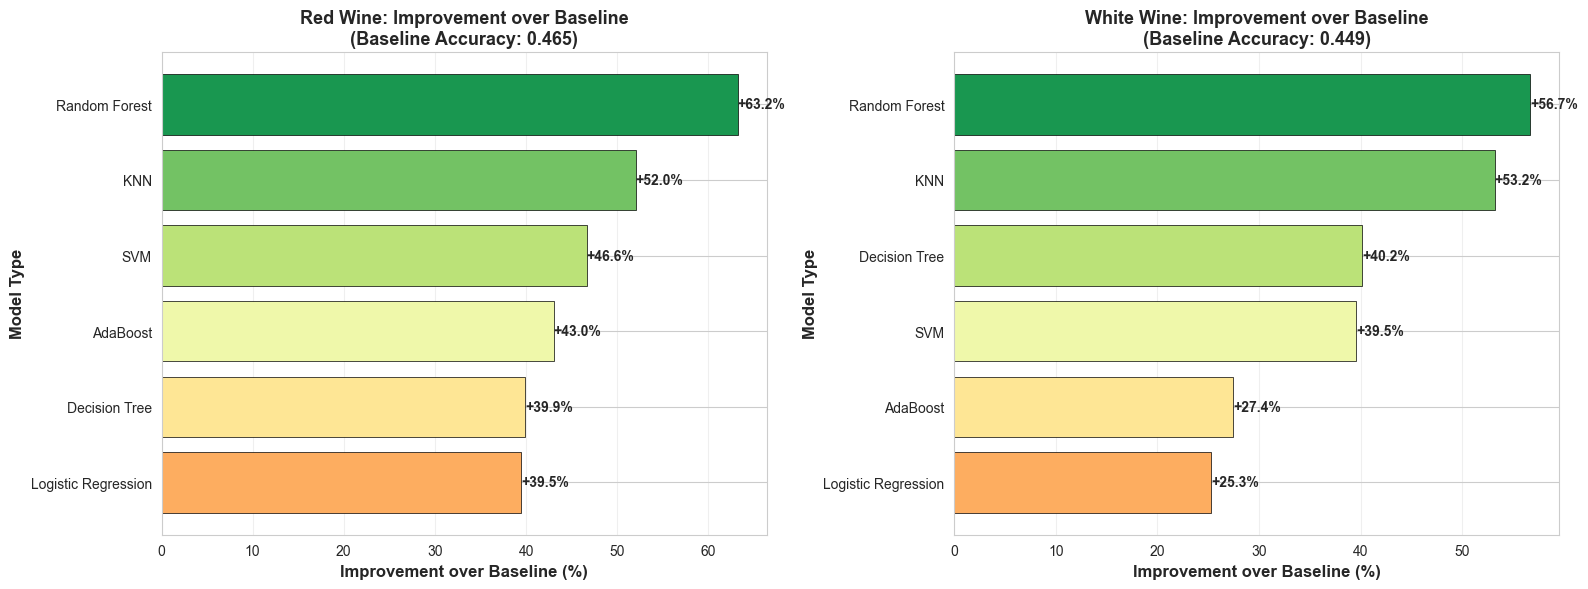


Improvement over Baseline:
         model_type wine_type  accuracy  baseline  improvement_%
           AdaBoost       red  0.664583  0.464583      43.049327
           AdaBoost     white  0.572109  0.448980      27.424242
      Decision Tree       red  0.650000  0.464583      39.910314
      Decision Tree     white  0.629252  0.448980      40.151515
                KNN       red  0.706250  0.464583      52.017937
                KNN     white  0.687755  0.448980      53.181818
Logistic Regression       red  0.647917  0.464583      39.461883
Logistic Regression     white  0.562585  0.448980      25.303030
      Random Forest       red  0.758333  0.464583      63.228700
      Random Forest     white  0.703401  0.448980      56.666667
                SVM       red  0.681250  0.464583      46.636771
                SVM     white  0.626531  0.448980      39.545455


In [19]:
baseline_performance = {}

for wine_type in ['red', 'white']:
    baseline = results_df[
        (results_df['wine_type'] == wine_type) & 
        (results_df['model_type'] == 'Baseline Model')
    ]['accuracy'].values[0]
    baseline_performance[wine_type] = baseline

improvement_data = []

for _, row in best_results.iterrows():
    if row['model_type'] not in ['Baseline Model', 'Stratified Baseline Model']:
        baseline_acc = baseline_performance[row['wine_type']]
        improvement = ((row['accuracy'] - baseline_acc) / baseline_acc) * 100
        
        improvement_data.append({
            'model_type': row['model_type'],
            'wine_type': row['wine_type'],
            'accuracy': row['accuracy'],
            'baseline': baseline_acc,
            'improvement_%': improvement
        })

improvement_df = pd.DataFrame(improvement_data)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, wine_type in enumerate(['red', 'white']):
    wine_imp = improvement_df[improvement_df['wine_type'] == wine_type]
    wine_imp = wine_imp.sort_values('improvement_%')
    
    ax = axes[idx]
    colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(wine_imp)))
    
    bars = ax.barh(wine_imp['model_type'], wine_imp['improvement_%'], color=colors, edgecolor='black', linewidth=0.5)
    ax.set_xlabel('Improvement over Baseline (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Model Type', fontsize=12, fontweight='bold')
    ax.set_title(f'{wine_type.capitalize()} Wine: Improvement over Baseline\n(Baseline Accuracy: {baseline_performance[wine_type]:.3f})', 
                fontsize=13, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2.,
               f'+{width:.1f}%',
               ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'figures' / 'improvement_over_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nImprovement over Baseline:")
print(improvement_df.to_string(index=False))

## Summary Table

In [20]:
summary_table = best_results[[
    'model_type', 'wine_type', 'accuracy', 'precision', 'recall', 'f1'
]].copy()

summary_table = summary_table.round(4)
summary_table = summary_table.sort_values(['wine_type', 'accuracy'], ascending=[True, False])

print(summary_table.to_string(index=False))

summary_table.to_csv(RESULTS_DIR / 'summary_results.csv', index=False)
print(f"\nSummary table saved to: {RESULTS_DIR / 'summary_results.csv'}")

               model_type wine_type  accuracy  precision  recall     f1
            Random Forest       red    0.7583     0.7622  0.7583 0.7566
                      KNN       red    0.7062     0.7132  0.7062 0.7082
                      SVM       red    0.6812     0.6826  0.6812 0.6814
                 AdaBoost       red    0.6646     0.6810  0.6646 0.6543
            Decision Tree       red    0.6500     0.6508  0.6500 0.6503
      Logistic Regression       red    0.6479     0.6406  0.6479 0.6331
           Baseline Model       red    0.4646     0.2158  0.4646 0.2947
Stratified Baseline Model       red    0.3583     0.3638  0.3583 0.3609
            Random Forest     white    0.7034     0.7120  0.7034 0.7031
                      KNN     white    0.6878     0.6904  0.6878 0.6878
            Decision Tree     white    0.6293     0.6296  0.6293 0.6293
                      SVM     white    0.6265     0.6335  0.6265 0.6250
                 AdaBoost     white    0.5721     0.5741  0.5721